In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib
import nilearn
from nilearn import plotting
from nipype.interfaces.ants import N4BiasFieldCorrection
import numpy as np
from nilearn import plotting
from nipype.interfaces.ants.segmentation import BrainExtraction
from nilearn import plotting
from nilearn import image
from nibabel.affines import apply_affine
import matplotlib.pyplot as plt
import seaborn as sns

/home/quizhpilema.134643/anaconda3/lib/python3.9/site-packages/nilearn/image/resampling.py:531: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/quizhpilema.134643/anaconda3/lib/python3.9/site-packages/nilearn/image/resampling.py:531: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


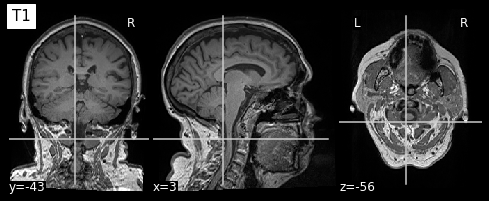

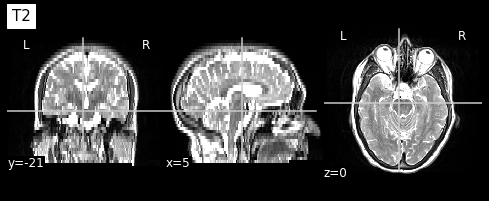

In [62]:
local_data_dir = '/opt/dora/Dora/IBEAS/BIDS-IBEAS/sub-PAC001/'
T1_filename = local_data_dir + 'anat/sub-PAC001_run-1_T1w.nii.gz'
T2_filename = local_data_dir +'/extra_data/sub-PAC001_acq-t2tseaxial_rec-2DORIGINALPRIMARYMNONE_run-1_mod-t2tseaxial.nii.gz'
T1_img = nib.load(T1_filename)
T2_img = nib.load(T2_filename)

T1_data_affine = T1_img.affine

# grab data array
T1_data = T1_img.get_fdata()
T2_data = T2_img.get_fdata()

# plot
plotting.plot_anat(T1_filename, title="T1", vmax=500)
plotting.plot_anat(T2_filename, title="T2", vmax=500)

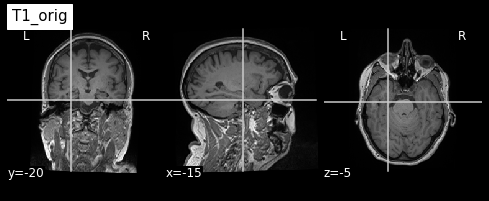

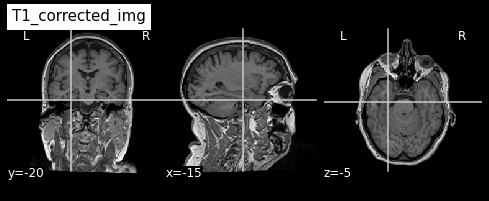

In [9]:
subject_dir = '/opt/dora/Dora/IBEAS/Resultados/Volumetria/T1-PAC-001/mri/'
T1_orig = subject_dir + 'orig.mgz'
T1_corrected = subject_dir + 'nu.mgz'
T1_img_orig = nib.load(T1_orig)
T1_img_corrected = nib.load(T1_corrected)

# plot
cut_coords = (-15,-20,-5)
plotting.plot_anat(T1_orig, title="T1_orig", cut_coords=cut_coords, vmax=255)
plotting.plot_anat(T1_corrected, title="T1_corrected_img", cut_coords=cut_coords, vmax=255)

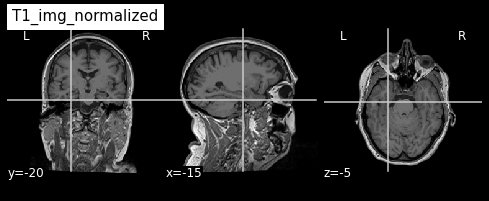

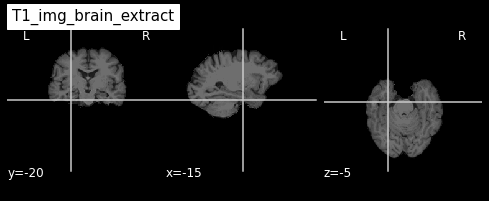

In [12]:
T1_normalized = subject_dir + 'T1.mgz'
T1_brain_extract = subject_dir + 'brainmask.mgz'
T1_img_normalized = nib.load(T1_normalized)
T1_img_brain_extract = nib.load(T1_brain_extract)

# plot
cut_coords = (-15,-20,-5)
plotting.plot_anat(T1_img_normalized, title="T1_img_normalized", cut_coords=cut_coords, vmax=255)
plotting.plot_anat(T1_img_brain_extract, title="T1_img_brain_extract", cut_coords=cut_coords, vmax=255)

In [16]:
cut_coords = (-40,10,0)

A = np.array([[1.053177, -0.061204, -0.060685, 90.310684],
             [0.070210, 1.009246, 0.117766, -9.806847],
             [0.023069, -0.117785, 1.186777, 13.209366],
             [0. ,0. , 0., 1.]])

cut_coords_affine_transformed = apply_affine(A, cut_coords)
x,y,z = cut_coords_affine_transformed
cut_coords_affine_transformed_str = "({},{},{})".format(int(x),int(y),int(z))

print("Subject space to refernce space mapping:\n {} --> {}".format(cut_coords,cut_coords_affine_transformed_str))


Subject space to refernce space mapping:
 (-40, 10, 0) --> (47,-2,11)


TypeError: Cannot slice image objects; consider using `img.slicer[slice]` to generate a sliced image (see documentation for caveats) or slicing image array data with `img.dataobj[slice]` or `img.get_fdata()[slice]`

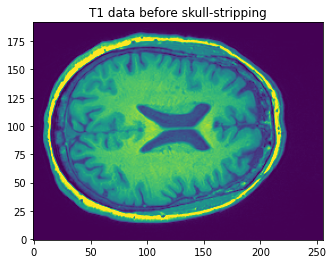

In [34]:
# Plot first figure
plt.imshow(T1_data[:, :, 175], vmax=300, origin="lower")
plt.title('T1 data before skull-stripping')
# Plot second figure
plt.imshow(T1_img_brain_extract[:, :, 175], vmax=300, origin="lower")
plt.title('T1 data after skull-stripping')

(0.0, 300.0)

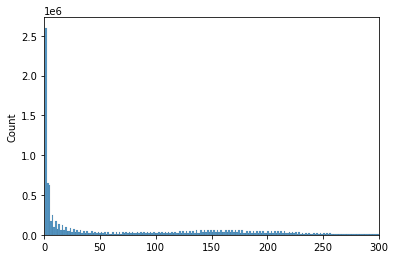

In [39]:
# Compute the optimal bin size according to the data
bins = np.histogram_bin_edges(T1_data[T1_data != 0], bins='auto')
# Plot the histogram
sns.histplot(T1_data[T1_data != 0], bins=bins)
plt.xlim([0, 300])

KeyboardInterrupt: 

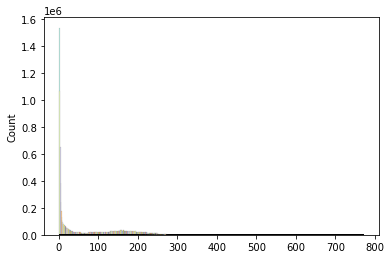

In [41]:
import itertools
labels = np.unique(T1_data[T1_data != 0]).astype('int')
palette = itertools.cycle(sns.color_palette("Set3"))
for label in labels:
    sns.histplot(T1_data[T1_data == label], bins=bins, color=next(palette), alpha=0.6)

In [42]:
from nilearn.datasets import fetch_atlas_aal
AAL_dataset = fetch_atlas_aal()
AAL_maps = AAL_dataset.maps
AAL_labels = AAL_dataset['labels']
AAL_labels_ix = AAL_dataset['indices']


Dataset created in /home/quizhpilema.134643/nilearn_data/aal_SPM12



 ...done. (1 seconds, 0 min)
Extracting data from /home/quizhpilema.134643/nilearn_data/aal_SPM12/9845813e2300e5b614a9dd2713e13445/aal_for_SPM12.tar.gz..... done.


In [43]:
AAL_img = nib.load(AAL_maps)
AAL_img.shape

(91, 109, 91)

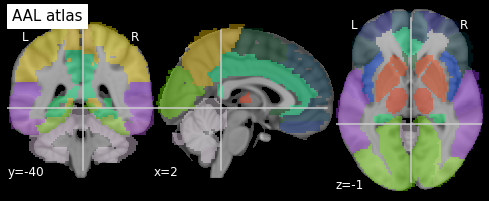

In [45]:
t1_mni = '/usr/local/fsl/data/standard/MNI152_T1_1mm_brain.nii.gz'
plotting.plot_roi(roi_img=AAL_maps, bg_img=t1_mni, alpha=0.4, title="AAL atlas");

In [46]:
roi_label = "Supp_Motor_Area_L"
roi_label_pos = AAL_labels.index(roi_label)
roi_ix = int(AAL_labels_ix[roi_label_pos])
print(roi_ix)

2401


In [48]:
roi_mask_arr_bool = (AAL_img.get_fdata() == roi_ix)
roi_mask_arr = roi_mask_arr_bool.astype(int)

In [49]:
roi_mask = nib.Nifti1Image(roi_mask_arr, affine=AAL_img.affine)

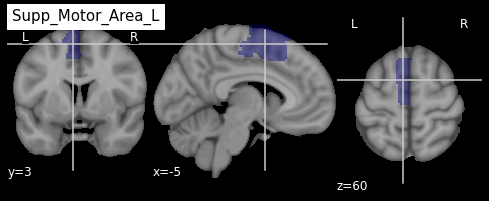

In [50]:
plotting.plot_roi(roi_img=roi_mask, bg_img=t1_mni, alpha=0.4, title=roi_label);

In [70]:

roi_ix = 50
roi_mask_arr_bool = (subject_dir+'/aseg.mgz' == roi_ix)
roi_mask_arr = roi_mask_arr_bool.astype(int)
roi_mask = nib.Nifti1Image(roi_mask_arr, affine=T1_data_affine)

AttributeError: 'bool' object has no attribute 'astype'

In [66]:
plotting.plot_roi(roi_img=roi_mask, bg_img=T1_data, alpha=0.4, title='Right Caudate');

TypeError: Data given cannot be loaded because it is not compatible with nibabel format:
0.0